<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:CornflowerBlue; border:0' role="tab" aria-controls="home"><center>Quick Navigation</center></h3>

* [Introduction](#1)
* [Import and Pre-Processing](#2)
* [Build and Train model](#3)
* [Evaluate Model](#4)
* [Evaluate Model on Custom Images](#5)

<a id="2"></a>
<h3 style='background:CornflowerBlue; border:0; color:white'><center>Import and Pre-Processing<center><h3>

### TODO: 
1. functioanlize the model in this code 
2. duplicate the aim1.1.2_chexpert 
3. edit it to work for cifar100

In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
sys.path.append('../../')

import funcs 
import load_data
import itertools
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # Hide all TensorFlow debugging logs

import numpy as np
# import matplotlib.pyplot as plt

# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
# from tensorflow.keras.datasets import cifar100
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.applications import densenet
# from tensorflow.keras.models import Sequential, Model, load_model
# from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

# from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix


%reload_ext load_data
%reload_ext funcs

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-06-08 21:37:32.929266: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-08 21:37:32.929591: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


pytorch version can be found [here](https://blog.jovian.ai/image-classification-of-cifar100-dataset-using-pytorch-8b7145242df1)

In [15]:
# # Load dataset and pre-process data
# (X_train, y_train), (X_test, y_test) = cifar100.load_data()
# X_train = X_train / 255.0
# X_test = X_test / 255.0


# # Split the data into test and validation data
# X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.7)


# # Dataset class labels
# labels =  ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 
#            'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 
#            'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard', 
#            'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 
#            'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 
#            'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 
#            'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 
#            'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 
#            'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']


# # Convert labels to one hot encoding matrix
# y_train = to_categorical(y_train, 100)
# y_test  = to_categorical(y_test, 100)
# y_valid = to_categorical(y_valid, 100)


# # Generate augmented images
# datagen = ImageDataGenerator(
#     height_shift_range=0.2,
#     width_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     rotation_range=40,
#     horizontal_flip=True,
#     vertical_flip=True,
#     fill_mode='nearest',
# )

# datagen.fit(X_train)

In [2]:
data, info = load_data.load_cifar100()

In [17]:
# # Visualize several images and their classes from the training set
# plt.figure(figsize=(20, 3))

# for i in range(10):
#     plt.subplot(1, 10, i + 1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(X_train[i], cmap="gray")
#     plt.xlabel(labels[y_train[i].astype(int)[0]])
    
# plt.show()

(7000, 100)

<a id="3"></a>
<h3 style='background:CornflowerBlue; border:0; color:white'><center>Build and Train model<center><h3>

In [4]:
# # Function for model building
# def build_model(input_shape, n_classes):
#     """
#     Build model from DenseNet. Retrain last 5 layers and adds 2 Dense layers.
#     :param input_shape: shape of single image
#     :param n_classes: number of classes for prediction
#     :return model: compiled model
#     """
#     base_model = densenet.DenseNet121(input_shape=input_shape,
#                                       weights="imagenet",
#                                       include_top=False,
#                                       pooling='avg')

#     for layer in base_model.layers[:-5]:
#         layer.trainable = False

#     for layer in base_model.layers[-5:]:
#         layer.trainable = True

#     x = base_model.output

#     x = Dense(128)(x)
#     x = Activation('relu')(x)
#     predictions = Dense(n_classes, activation='softmax')(x)
#     model = Model(inputs=base_model.input, outputs=predictions)
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#     return model

# model = build_model(input_shape=(32, 32, 3), n_classes=len(data.labels))
# # model.summary()

# # Set checkpointer and train model
# callbacks = funcs.func_CallBacks(dir_save='best_model.h5', mode='min', monitor='val_loss')

# history = model.fit(data.train_generator, validation_data=data.valid, epochs=1, verbose=1, use_multiprocessing=False, 
#                callbacks=callbacks, steps_per_epoch=info.steps_per_epoch,validation_steps=info.validation_steps,)

In [3]:
%%time
model = funcs.optimize(dir='', train_dataset=data.train_generator, valid_dataset=data.valid, epochs=1, Info=info, architecture_name='DenseNet121', activation='softmax', first_index_trainable=-5, use_multiprocessing=False)

/opt/homebrew/Caskroom/miniforge/base/envs/paper_miniforge/lib/python3.8/site-packages/keras_preprocessing/image/affine_transformations.py:327: DeprecationWarning: Please use `affine_transform` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  channel_images = [ndimage.interpolation.affine_transform(
2022-06-08 21:38:01.968879: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


390/390 [==============================] - ETA: 0s - loss: 0.0467 - accuracy: 0.1703
Epoch 1: val_loss improved from inf to 0.03934, saving model to best_model.h5
390/390 [==============================] - 107s 231ms/step - loss: 0.0467 - accuracy: 0.1703 - val_loss: 0.0393 - val_accuracy: 0.2670
CPU times: user 2min 2s, sys: 25.8 s, total: 2min 27s
Wall time: 1min 49s


<a id="4"></a>
<h3 style='background:CornflowerBlue; border:0; color:white'><center>Evaluate Model<center><h3>

In [10]:
# # Show Loss and Accuracy Plots
# fig, ax = plt.subplots(2, 1)

# ax[0].plot(history.history['loss'], color='b', label="Training Loss")
# ax[0].plot(history.history['val_loss'], color='r', label="validation Loss",axes=ax[0])
# legend = ax[0].legend(loc='best', shadow=True)

# ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
# ax[1].plot(history.history['val_accuracy'], color='r', label="Validation Accuracy")
# legend = ax[1].legend(loc='best', shadow=True)

In [6]:
# Evaluate model on validation data
X_test, y_test = data.test[0], data.test[1]
_, evaluation_score = model.evaluate(X_test, y_test)
print(f'Evaluation Score: {int(evaluation_score * 100)} %')


In [9]:
# Get classification report
pred = np.argmax(model.predict(X_test), axis=1)
test_y = np.argmax(y_test, axis=1)

print(classification_report(test_y, pred, labels=list(range(len(data.labels)))))


              precision    recall  f1-score   support

           0       0.51      0.70      0.59        30
           1       0.41      0.27      0.33        33
           2       0.27      0.26      0.26        27
           3       0.00      0.00      0.00        30
           4       0.00      0.00      0.00        32
           5       0.80      0.13      0.23        30
           6       0.22      0.17      0.19        29
           7       0.18      0.21      0.19        28
           8       0.53      0.22      0.31        36
           9       0.35      0.30      0.32        27
          10       0.00      0.00      0.00        17
          11       0.29      0.06      0.10        35
          12       0.41      0.35      0.38        26
          13       0.13      0.23      0.16        31
          14       0.24      0.34      0.29        32
          15       0.14      0.03      0.05        34
          16       0.36      0.44      0.39        34
          17       0.43    

<a id="5"></a>
<h3 style='background:CornflowerBlue; border:0; color:white'><center>Evaluate Model on Custom Images<center><h3>

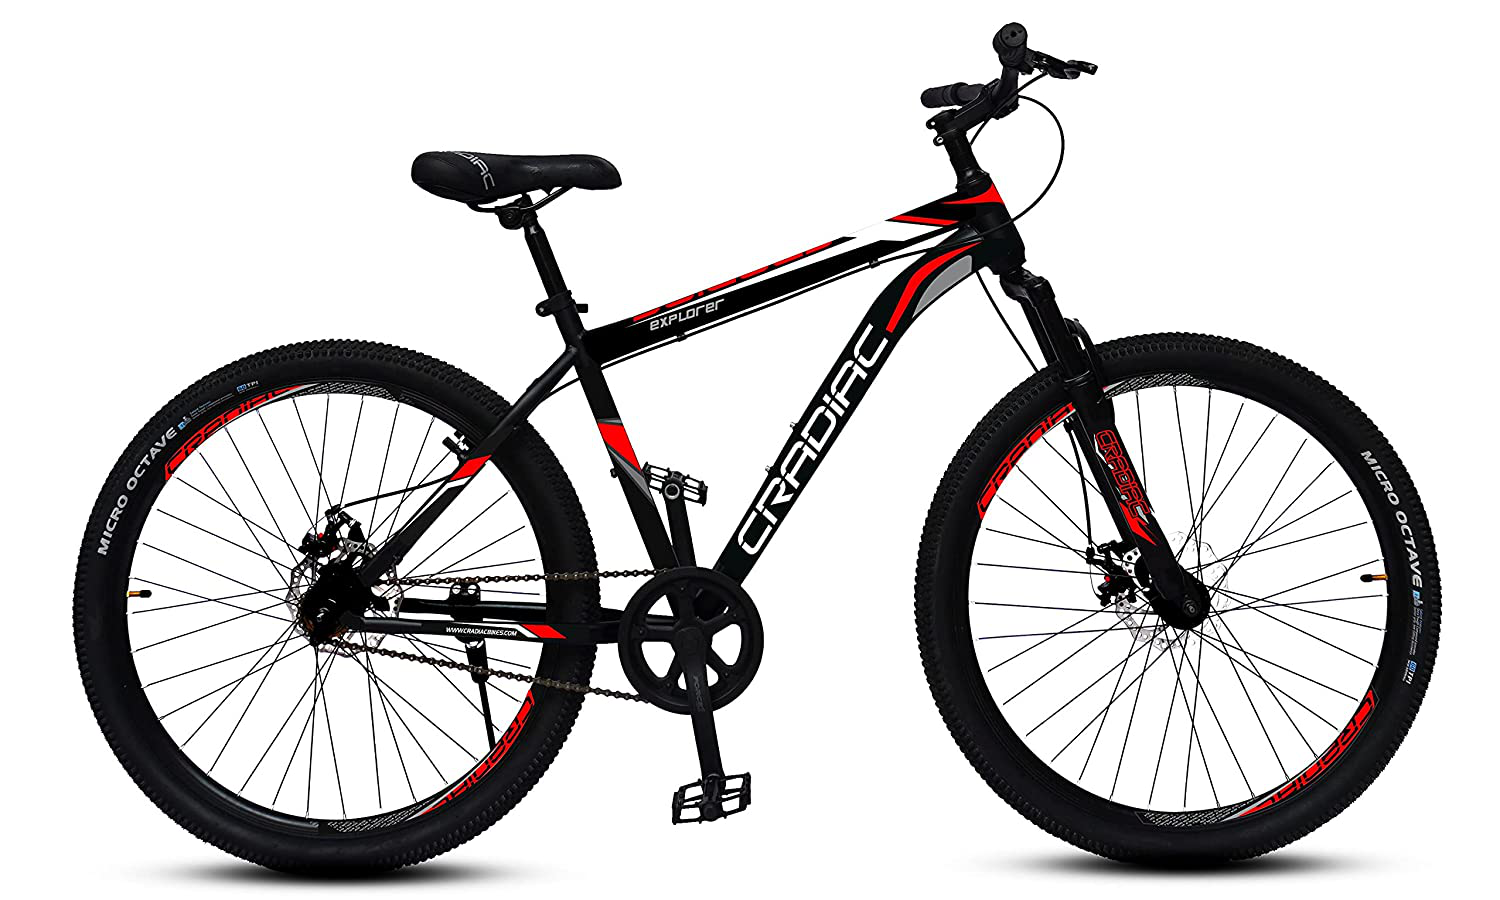

In [33]:
# Download image with bicycle from custom data
load_img('../input/bicycle/8195dKteEvL._SL1500_.jpg')

In [34]:
# Get the names of the class labels
labels_names = []
for i in range(len(labels)):
    labels_names += [i]
    
reverse_mapping = dict(zip(labels_names, labels)) 

def mapper(value):
    return reverse_mapping[value]

In [35]:
# Pre-process image
image_1 = load_img('../input/bicycle/8195dKteEvL._SL1500_.jpg', target_size=(32, 32))
image_1 = img_to_array(image_1) 
image_1 = image_1 / 255.0
prediction_image_1 = np.array(image_1)
prediction_image_1 = np.expand_dims(image_1, axis=0)

In [36]:
# Get prediction
prediction_1 = model.predict(prediction_image_1)
value_1 = np.argmax(prediction_1)
name_1 = mapper(value_1)
print(f'Prediction is {name_1}.')

Prediction is bicycle.


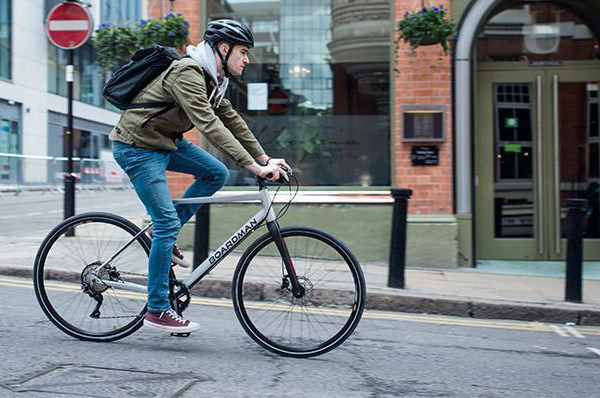

In [37]:
# Download second image with bicycle from custom data
load_img('../input/bicycle/hybrid-sports-bike-road-cr.jpg')

In [38]:
# Pre-process one more image
image_2 = load_img('../input/bicycle/8195dKteEvL._SL1500_.jpg', target_size=(32, 32))
image_2 = img_to_array(image_2) 
image_2 = image_2 / 255.0
prediction_image_2 = np.array(image_2)
prediction_image_2 = np.expand_dims(image_2, axis=0)

In [39]:
# Get prediction
prediction_2 = model.predict(prediction_image_2)
value_2 = np.argmax(prediction_2)
name_2 = mapper(value_2)
print(f'Prediction is {name_2}.')

Prediction is bicycle.
